<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [4]:
data = pd.read_csv('DMV_Written_Tests.csv')
data.head(5)

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [25]:
scores = data.drop('Results' , axis = 1).values
results = data.Results.values

### Task 3: Visualize the Data
---

<function matplotlib.pyplot.show(close=None, block=None)>

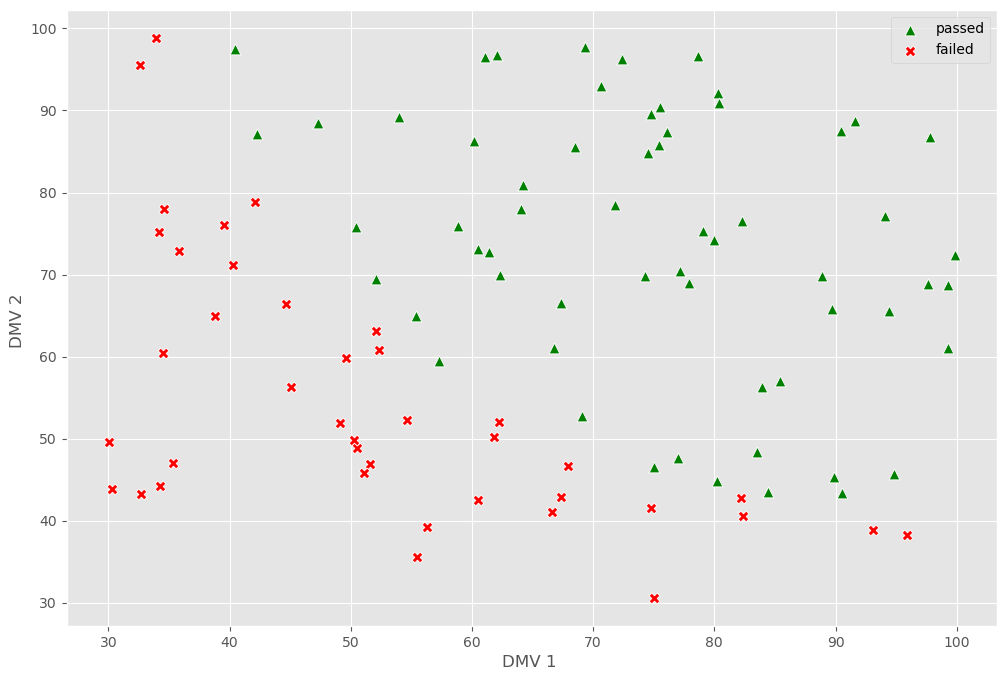

In [36]:
passed = (results==1).reshape(100 ,1 )
failed = (results==0).reshape(100 ,1 )

ax = sns.scatterplot(x = scores[passed[:, 0] , 0] , 
                    y = scores[passed[: , 0],1] ,
                    marker = '^' ,
                    color = 'green' ,
                    s = 60)
sns.scatterplot(x = scores[failed[: ,0] , 0] , 
                    y = scores[failed[:,0],1] ,
                    marker = 'X' ,
                    color = 'red' ,
                    s = 60)

ax.set(xlabel = 'DMV 1 ' , ylabel = 'DMV 2 ')
ax.legend(['passed','failed'])
plt.show



### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [44]:
def logistic_function(x): 
    return 1/(1+np.exp(-x))


In [46]:
logistic_function(0)

0.5

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [83]:
def compute_cost(theta , x , y) : 
    m = len (y)
    y_pred = logistic_function(np.dot(x , theta))
    error = (y*np.log(y_pred)) + (1-y) * np.log(1-y_pred)
    cost = - 1 / m * sum(error)
    gradient = 1 / m * np.dot(x.transpose(),(y_pred - y ))
    
    return cost[0] , gradient
    


### Task 6: Cost and Gradient at Initialization
---

In [152]:
mean_scores = np.mean(scores , axis = 0)
std_scores = np.std(scores , axis = 0)
scores = (scores - mean_scores)/std_scores

rows = scores.shape[0]
cols = scores.shape[1]

x = np.append(np.ones ((rows ,1)) ,scores , axis= 1 )
y = results.reshape(rows,1)

theta_init = np.zeros((cols +1 ,1 ))

cost , gradient = compute_cost(theta_init , x , y)

print(f"cost = {cost} , gradient = {gradient}")


cost = 0.693147180559946 , gradient = [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [153]:
def gradient_decent(x,y , theta , lr , epotch): 
    costs = []
    for i in range(epotch): 
        cost , gradient = compute_cost(theta , x , y )
        theta -= (lr*gradient)
        costs.append(cost)
    return theta , costs    

In [154]:
theta , costs = gradient_decent(x,y , theta_init , 1, 200)

In [151]:
print(theta)
print(costs[0])
print(costs[-1])

[[1.71844785]
 [3.9927841 ]
 [3.72513312]]
0.20349770159021416
0.20349770158951674


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

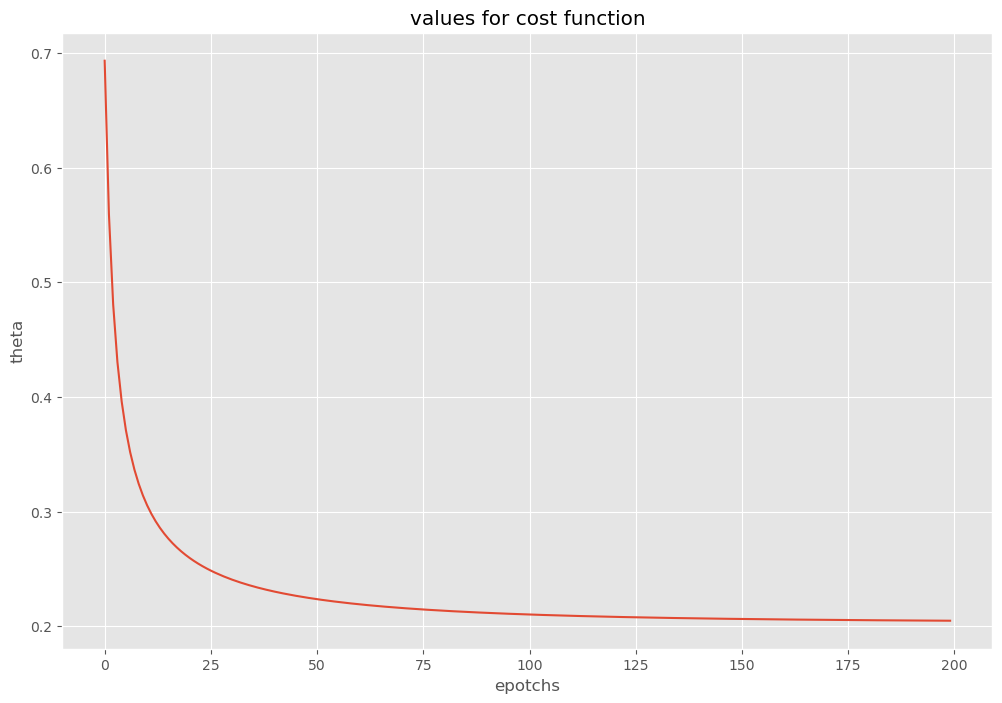

In [155]:
plt.plot(costs)
plt.xlabel("epotchs")
plt.ylabel('theta')
plt.title("values for cost function")
plt.show()

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1" 

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us 

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

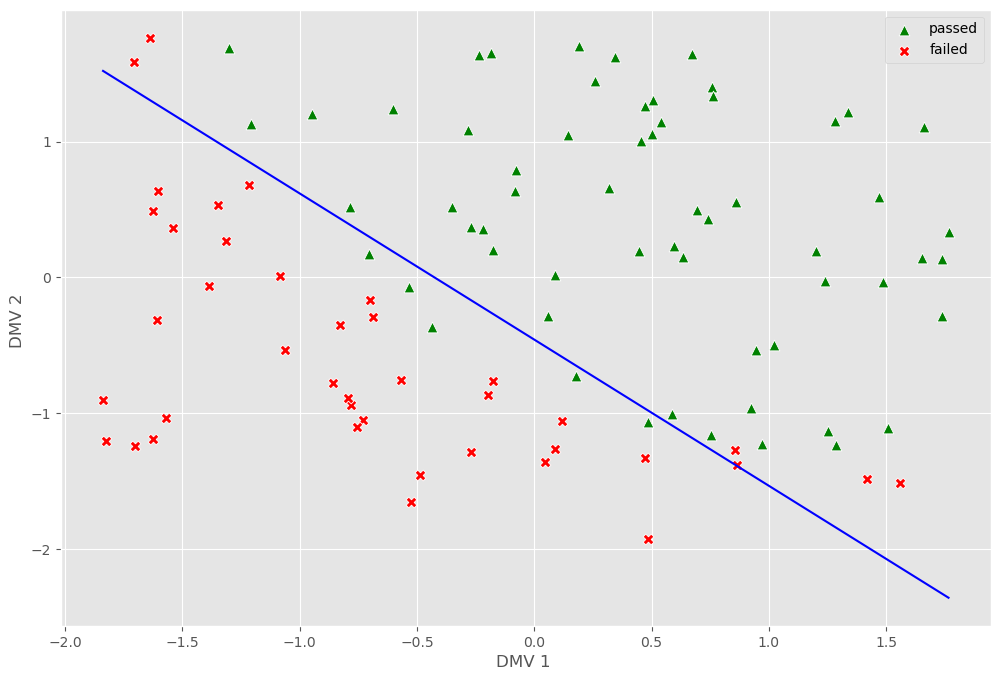

In [174]:
ax = sns.scatterplot(x = x[passed[:, 0] , 1] , 
                    y = x[passed[: , 0],2] ,
                    marker = '^' ,
                    color = 'green' ,
                    s = 60)
sns.scatterplot(x = x[failed[: ,0] , 1] , 
                    y = x[failed[:,0],2] ,
                    marker = 'X' ,
                    color = 'red' ,
                    s = 60)

ax.set(xlabel = 'DMV 1 ' , ylabel = 'DMV 2 ')
ax.legend(['passed','failed'])

x_boundary = np.array([np.min(x[: ,1]) , np.max(x[: ,1])])
y_boundary = -(theta[0] + theta[1] * x_boundary )/ theta[2]
sns.lineplot(x = x_boundary , y = y_boundary , color = 'blue')
plt.show();

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [176]:
def prediction(theta , x) : 
    results = x.dot(theta)
    return results > 0 

In [177]:
p = prediction(theta , x) 
print('training accuracy' , sum(p==y) [0] ,"%")

training accuracy 89 %


In [181]:
test = np.array([50 , 79]) 
test= (test - mean_scores) / std_scores

test = np .append(np.ones(1) ,test) 
probability = logistic_function(test.dot(theta))

print("probability" , np.round(probability[0] , 2))

probability 1.0
